<a href="https://colab.research.google.com/github/YuliaBudko/author-attribution-with-cnn-tensorflow/blob/main/Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ksenia and Yulia: Binary problem
Status: Works, usually above 90%

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

# Walk through the Handwriting_Sample directory and list number fo files
for dirpath, dirnames, filenames in os.walk("gdrive/MyDrive/Handwriting_Sample"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'gdrive/MyDrive/Handwriting_Sample
There are 2 directories and 0 images in 'gdrive/MyDrive/Handwriting_Sample/test
There are 0 directories and 59 images in 'gdrive/MyDrive/Handwriting_Sample/test/ksenia
There are 0 directories and 59 images in 'gdrive/MyDrive/Handwriting_Sample/test/yulia
There are 2 directories and 0 images in 'gdrive/MyDrive/Handwriting_Sample/train
There are 0 directories and 244 images in 'gdrive/MyDrive/Handwriting_Sample/train/ksenia
There are 0 directories and 239 images in 'gdrive/MyDrive/Handwriting_Sample/train/yulia


In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("gdrive/MyDrive/Handwriting_Sample/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirectory
print(class_names)

['ksenia' 'yulia']


In [ ]:
# Let's visualise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['Screenshot 2022-12-17 at 13.36.41.png']
Image shape: (138, 430, 4)


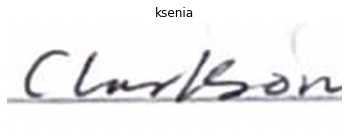

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="gdrive/MyDrive/Handwriting_Sample/train/",
                        target_class="ksenia")

In [ ]:
# Define directory dataset paths
train_dir = "gdrive/MyDrive/Handwriting_Sample/train/"
test_dir = "gdrive/MyDrive/Handwriting_Sample/test/"

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 483 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # Get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# View the first batch of labels
labels

array([0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.],
      dtype=float32)

In [ ]:
import tensorflow as tf

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
16/16 [==============================] - 3s 158ms/step - loss: 0.7208 - accuracy: 0.4803 - val_loss: 0.6747 - val_accuracy: 0.5169
Epoch 2/5
16/16 [==============================] - 2s 135ms/step - loss: 0.6309 - accuracy: 0.5673 - val_loss: 0.5634 - val_accuracy: 0.8051
Epoch 3/5
16/16 [==============================] - 2s 132ms/step - loss: 0.4287 - accuracy: 0.8613 - val_loss: 0.2469 - val_accuracy: 0.9153
Epoch 4/5
16/16 [==============================] - 2s 137ms/step - loss: 0.2375 - accuracy: 0.9193 - val_loss: 0.1273 - val_accuracy: 0.9746
Epoch 5/5
16/16 [==============================] - 2s 136ms/step - loss: 0.0947 - accuracy: 0.9689 - val_loss: 0.0635 - val_accuracy: 0.9831


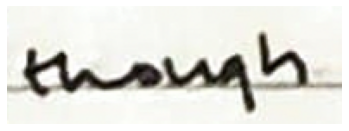

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

yulia_writing = mpimg.imread("Screenshot 2022-12-17 at 16.33.28.png")
plt.imshow(yulia_writing)
plt.axis(False);

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  # Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  if len(img.shape) > 2 and img.shape[2] == 4:
    #slice off the alpha channel
    img = img[:, :, :3]

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

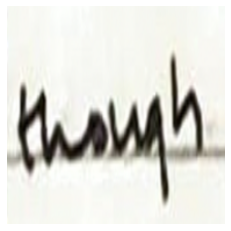

In [ ]:
yulia_writing = load_and_prep_image("Screenshot 2022-12-17 at 16.33.28.png")
plt.imshow(yulia_writing)
plt.axis(False);

In [ ]:
pred = model_1.predict(tf.expand_dims(yulia_writing, axis=0))
pred

1/1 [==============================] - 0s 16ms/step


array([[0.9774785]], dtype=float32)

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  # Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 31ms/step


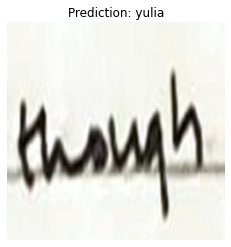

In [ ]:
# Test our model on a custom image
pred_and_plot(model_1, "Screenshot 2022-12-17 at 16.33.28.png")

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training curves seperately
def plot_loss_curves(history):
  # Returns seperate loss curves for training and validation metrics
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

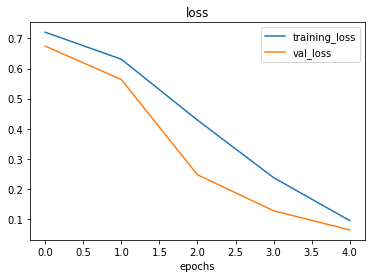

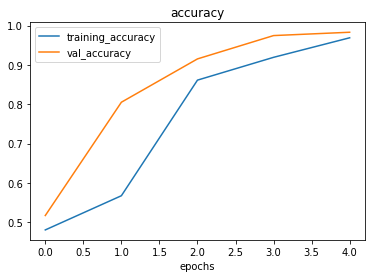

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.evaluate(test_data)

4/4 [==============================] - 0s 99ms/step - loss: 0.0635 - accuracy: 0.9831


[0.0635431706905365, 0.9830508232116699]

## Multi-class problem

Status: Works, around 80% last time I tried

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

# Walk through the Handwriting_Sample directory and list number fo files
for dirpath, dirnames, filenames in os.walk("gdrive/MyDrive/Multi_Class_Handwriting_Samples"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples
There are 3 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/anatoli
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/ksenia
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/yulia
There are 3 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train
There are 0 directories and 239 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/anatoli
There are 0 directories and 240 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/ksenia
There are 0 directories and 239 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/yulia


In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("gdrive/MyDrive/Multi_Class_Handwriting_Samples/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirectory
print(class_names)

['anatoli' 'ksenia' 'yulia']


In [ ]:
# Define directory dataset paths
train_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/"
test_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/"

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="categorical", # Type of data you're working with
                                               batch_size=32) # Size of minibatches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 718 images belonging to 3 classes.
Found 177 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_2 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
23/23 [==============================] - 457s 20s/step - loss: 1.0890 - accuracy: 0.4220 - val_loss: 0.9920 - val_accuracy: 0.6554
Epoch 2/5
23/23 [==============================] - 3s 126ms/step - loss: 0.8127 - accuracy: 0.6727 - val_loss: 0.7079 - val_accuracy: 0.7684
Epoch 3/5
23/23 [==============================] - 3s 126ms/step - loss: 0.4386 - accuracy: 0.8357 - val_loss: 0.4916 - val_accuracy: 0.7458
Epoch 4/5
23/23 [==============================] - 3s 128ms/step - loss: 0.3925 - accuracy: 0.8412 - val_loss: 0.4847 - val_accuracy: 0.7910
Epoch 5/5
23/23 [==============================] - 3s 128ms/step - loss: 0.1740 - accuracy: 0.9568 - val_loss: 0.4578 - val_accuracy: 0.8192


In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training curves seperately
def plot_loss_curves(history):
  # Returns seperate loss curves for training and validation metrics
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

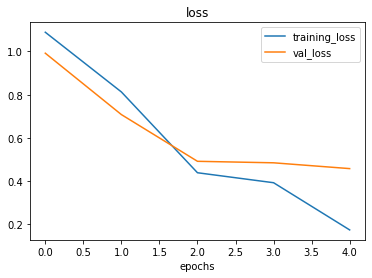

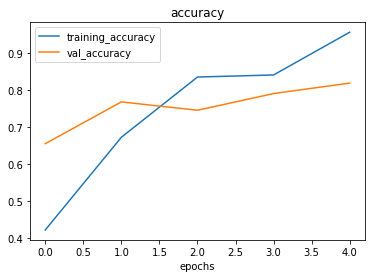

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  # Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  if len(img.shape) > 2 and img.shape[2] == 4:
    #slice off the alpha channel
    img = img[:, :, :3]

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

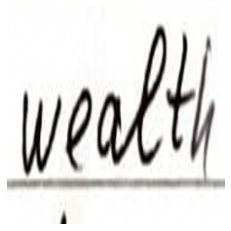

In [ ]:
anatoli_writing = load_and_prep_image("Screenshot 2022-12-21 at 22.22.17.png")
plt.imshow(anatoli_writing)
plt.axis(False);

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images, but this still works on binary classifcation
def pred_and_plot(model, filename, class_names=class_names):
  # Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred = model_2.predict(tf.expand_dims(anatoli_writing, axis=0))
pred

1/1 [==============================] - 0s 17ms/step


array([[9.9611545e-01, 3.8607051e-03, 2.3824421e-05]], dtype=float32)

1/1 [==============================] - 0s 17ms/step


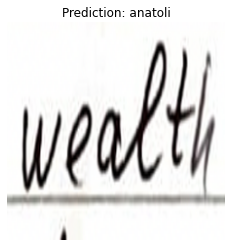

In [ ]:
pred_and_plot(model_2, "Screenshot 2022-12-21 at 22.22.17.png")

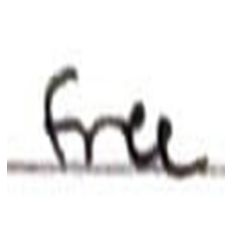

In [ ]:
yulia_writing = load_and_prep_image("Screenshot 2022-12-21 at 22.27.54.png")
plt.imshow(yulia_writing)
plt.axis(False);

1/1 [==============================] - 0s 26ms/step


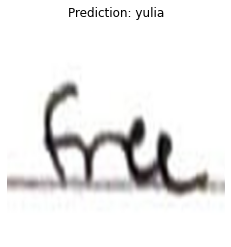

In [ ]:
pred_and_plot(model_2, "Screenshot 2022-12-21 at 22.27.54.png")

In [ ]:
model_2.evaluate(test_data)

6/6 [==============================] - 1s 94ms/step - loss: 0.4578 - accuracy: 0.8192


[0.4578169584274292, 0.8192090392112732]

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_4 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

## Improving upon model_2 (multi-class: 3 people)

Increased filters from 10 to 15

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

# Walk through the Handwriting_Sample directory and list number fo files
for dirpath, dirnames, filenames in os.walk("gdrive/MyDrive/Multi_Class_Handwriting_Samples"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples
There are 3 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/anatoli
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/ksenia
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/yulia
There are 3 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train
There are 0 directories and 239 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/anatoli
There are 0 directories and 240 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/ksenia
There are 0 directories and 239 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/yulia


In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("gdrive/MyDrive/Multi_Class_Handwriting_Samples/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirectory
print(class_names)

['anatoli' 'ksenia' 'yulia']


In [ ]:
# Define directory dataset paths
train_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/"
test_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/"

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="categorical", # Type of data you're working with
                                               batch_size=32) # Size of minibatches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 718 images belonging to 3 classes.
Found 177 images belonging to 3 classes.


Increasing number of filters from 10 to 15

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_3 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
23/23 [==============================] - 4s 150ms/step - loss: 1.6410 - accuracy: 0.3426 - val_loss: 1.0760 - val_accuracy: 0.3898
Epoch 2/5
23/23 [==============================] - 3s 138ms/step - loss: 1.0136 - accuracy: 0.4986 - val_loss: 0.8483 - val_accuracy: 0.7175
Epoch 3/5
23/23 [==============================] - 3s 140ms/step - loss: 0.7269 - accuracy: 0.7326 - val_loss: 0.5940 - val_accuracy: 0.7797
Epoch 4/5
23/23 [==============================] - 3s 136ms/step - loss: 0.4534 - accuracy: 0.8370 - val_loss: 0.3758 - val_accuracy: 0.8644
Epoch 5/5
23/23 [==============================] - 3s 139ms/step - loss: 0.2556 - accuracy: 0.9095 - val_loss: 0.3003 - val_accuracy: 0.8757


Ok, results really vary from 70 to 90%

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training curves seperately
def plot_loss_curves(history):
  # Returns seperate loss curves for training and validation metrics
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

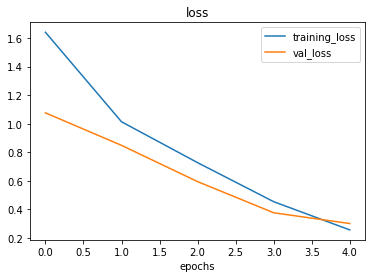

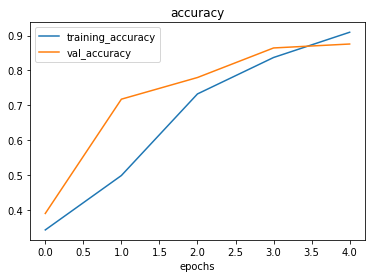

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.evaluate(test_data)

6/6 [==============================] - 1s 104ms/step - loss: 0.3003 - accuracy: 0.8757


[0.30025196075439453, 0.8757061958312988]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 15)      420       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 15)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 15)      2040      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 15)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 15)      2040      
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 15)      2040      
                                                      

## Experiment 2: inducing overfitting

- Attempt 1: Added two conv laters and another max pool layer
- Attempt 2: Increased filters from 15 to 20
- Attempt 3: Added two conv layers
- Attempt 4: Increased epochs from 5 to 10
- Attempt 5: Added four extra conv layers
- Attempt 6: Got rid of the four extra conv layers but also deleted a maxpool layer
- Attempt 7: Increased epochs from 10 to 20
- Attempt 8: Got rid of another maxpool layer (started overfitting quite a lot after this)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_4 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
23/23 [==============================] - 5s 193ms/step - loss: 1.0715 - accuracy: 0.3788 - val_loss: 0.9651 - val_accuracy: 0.7288
Epoch 2/5
23/23 [==============================] - 5s 202ms/step - loss: 0.8619 - accuracy: 0.6448 - val_loss: 0.6450 - val_accuracy: 0.7627
Epoch 3/5
23/23 [==============================] - 3s 141ms/step - loss: 0.5731 - accuracy: 0.7827 - val_loss: 0.4704 - val_accuracy: 0.7684
Epoch 4/5
23/23 [==============================] - 3s 141ms/step - loss: 0.3749 - accuracy: 0.8552 - val_loss: 0.3242 - val_accuracy: 0.8701
Epoch 5/5
23/23 [==============================] - 3s 139ms/step - loss: 0.2650 - accuracy: 0.8955 - val_loss: 0.2044 - val_accuracy: 0.9153


OK, this actually helped a lot (accuracy can definitely go up to over 90%)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_5 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
23/23 [==============================] - 4s 161ms/step - loss: 1.0870 - accuracy: 0.3677 - val_loss: 1.0751 - val_accuracy: 0.3333
Epoch 2/5
23/23 [==============================] - 4s 169ms/step - loss: 0.8915 - accuracy: 0.5724 - val_loss: 0.6646 - val_accuracy: 0.7232
Epoch 3/5
23/23 [==============================] - 5s 232ms/step - loss: 0.5184 - accuracy: 0.7688 - val_loss: 0.4420 - val_accuracy: 0.8418
Epoch 4/5
23/23 [==============================] - 4s 153ms/step - loss: 0.4305 - accuracy: 0.8245 - val_loss: 0.5093 - val_accuracy: 0.7966
Epoch 5/5
23/23 [==============================] - 3s 143ms/step - loss: 0.3377 - accuracy: 0.8760 - val_loss: 0.3567 - val_accuracy: 0.8362


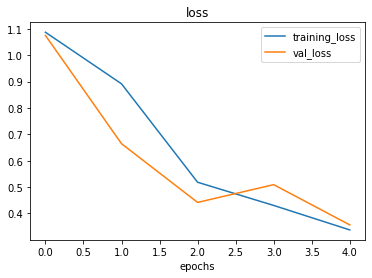

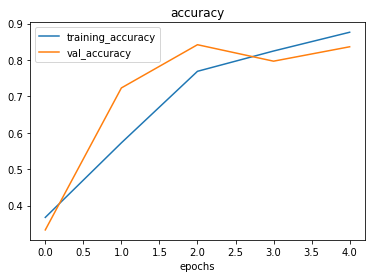

In [ ]:
plot_loss_curves(history_5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_6 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
23/23 [==============================] - 4s 157ms/step - loss: 1.0920 - accuracy: 0.3301 - val_loss: 1.0149 - val_accuracy: 0.3503
Epoch 2/5
23/23 [==============================] - 3s 144ms/step - loss: 0.8702 - accuracy: 0.6100 - val_loss: 0.6778 - val_accuracy: 0.7458
Epoch 3/5
23/23 [==============================] - 3s 143ms/step - loss: 0.6788 - accuracy: 0.6978 - val_loss: 0.6160 - val_accuracy: 0.7684
Epoch 4/5
23/23 [==============================] - 3s 143ms/step - loss: 0.5213 - accuracy: 0.7813 - val_loss: 0.5280 - val_accuracy: 0.7514
Epoch 5/5
23/23 [==============================] - 3s 145ms/step - loss: 0.3707 - accuracy: 0.8398 - val_loss: 0.4575 - val_accuracy: 0.8023


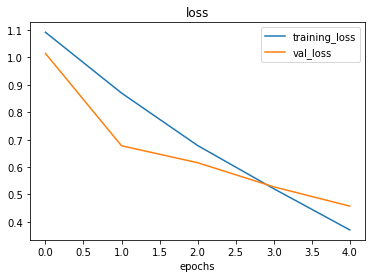

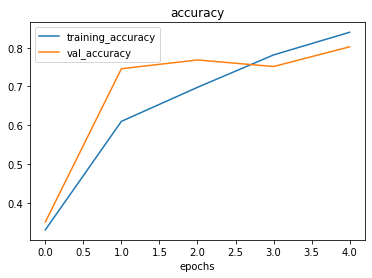

In [ ]:
plot_loss_curves(history_6)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_7 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_7.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_7 = model_7.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
23/23 [==============================] - 4s 151ms/step - loss: 1.0965 - accuracy: 0.4011 - val_loss: 1.0415 - val_accuracy: 0.6610
Epoch 2/10
23/23 [==============================] - 3s 142ms/step - loss: 0.9659 - accuracy: 0.5933 - val_loss: 0.8409 - val_accuracy: 0.7288
Epoch 3/10
23/23 [==============================] - 3s 142ms/step - loss: 0.7453 - accuracy: 0.7256 - val_loss: 0.4876 - val_accuracy: 0.8249
Epoch 4/10
23/23 [==============================] - 3s 141ms/step - loss: 0.5232 - accuracy: 0.8162 - val_loss: 0.2778 - val_accuracy: 0.8983
Epoch 5/10
23/23 [==============================] - 3s 145ms/step - loss: 0.3856 - accuracy: 0.8440 - val_loss: 0.2028 - val_accuracy: 0.9492
Epoch 6/10
23/23 [==============================] - 3s 142ms/step - loss: 0.2552 - accuracy: 0.8914 - val_loss: 0.4443 - val_accuracy: 0.8418
Epoch 7/10
23/23 [==============================] - 3s 140ms/step - loss: 0.2151 - accuracy: 0.9123 - val_loss: 0.2481 - val_accuracy: 0.9153
Epoch 

Accuracy up to 97%

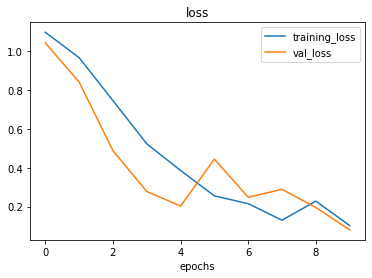

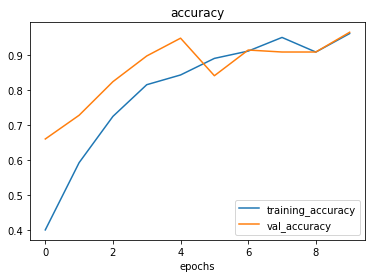

In [ ]:
plot_loss_curves(history_7)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_8 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
23/23 [==============================] - 4s 160ms/step - loss: 1.1011 - accuracy: 0.3398 - val_loss: 1.0929 - val_accuracy: 0.4011
Epoch 2/10
23/23 [==============================] - 4s 151ms/step - loss: 1.0292 - accuracy: 0.4638 - val_loss: 1.0854 - val_accuracy: 0.4181
Epoch 3/10
23/23 [==============================] - 3s 147ms/step - loss: 1.0087 - accuracy: 0.5028 - val_loss: 0.6449 - val_accuracy: 0.7175
Epoch 4/10
23/23 [==============================] - 3s 146ms/step - loss: 0.6470 - accuracy: 0.6838 - val_loss: 0.6428 - val_accuracy: 0.6215
Epoch 5/10
23/23 [==============================] - 3s 147ms/step - loss: 0.5163 - accuracy: 0.7744 - val_loss: 0.4439 - val_accuracy: 0.8079
Epoch 6/10
23/23 [==============================] - 3s 146ms/step - loss: 0.4938 - accuracy: 0.7702 - val_loss: 0.4675 - val_accuracy: 0.7627
Epoch 7/10
23/23 [==============================] - 3s 146ms/step - loss: 0.3912 - accuracy: 0.8440 - val_loss: 0.3512 - val_accuracy: 0.8757
Epoch 

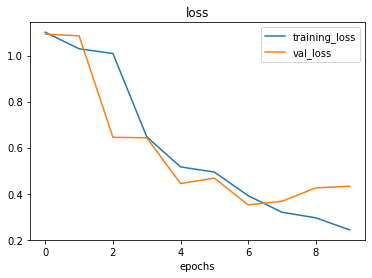

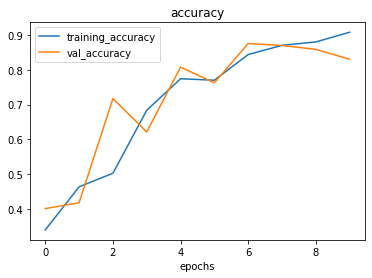

In [ ]:
plot_loss_curves(history_8)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_9 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
23/23 [==============================] - 4s 157ms/step - loss: 1.1030 - accuracy: 0.3468 - val_loss: 1.0401 - val_accuracy: 0.6102
Epoch 2/10
23/23 [==============================] - 3s 149ms/step - loss: 0.8344 - accuracy: 0.5933 - val_loss: 0.5436 - val_accuracy: 0.7627
Epoch 3/10
23/23 [==============================] - 3s 142ms/step - loss: 0.5557 - accuracy: 0.7591 - val_loss: 0.4374 - val_accuracy: 0.8644
Epoch 4/10
23/23 [==============================] - 3s 142ms/step - loss: 0.4221 - accuracy: 0.8245 - val_loss: 0.3555 - val_accuracy: 0.9040
Epoch 5/10
23/23 [==============================] - 3s 145ms/step - loss: 0.3748 - accuracy: 0.8440 - val_loss: 0.3731 - val_accuracy: 0.8588
Epoch 6/10
23/23 [==============================] - 3s 143ms/step - loss: 0.3583 - accuracy: 0.8454 - val_loss: 0.3323 - val_accuracy: 0.8192
Epoch 7/10
23/23 [==============================] - 3s 143ms/step - loss: 0.2017 - accuracy: 0.9248 - val_loss: 0.2969 - val_accuracy: 0.8757
Epoch 

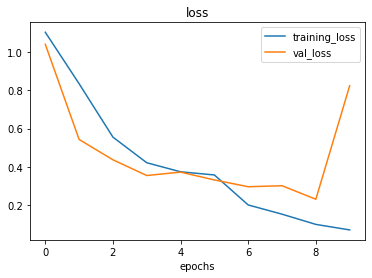

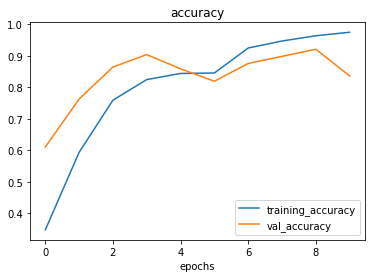

In [ ]:
plot_loss_curves(history_9)

Looks, like it's starting to overfit

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_10 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_10 = model_10.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
23/23 [==============================] - 4s 153ms/step - loss: 1.1267 - accuracy: 0.3969 - val_loss: 1.0297 - val_accuracy: 0.5480
Epoch 2/20
23/23 [==============================] - 3s 144ms/step - loss: 0.9873 - accuracy: 0.5292 - val_loss: 0.8302 - val_accuracy: 0.6384
Epoch 3/20
23/23 [==============================] - 3s 140ms/step - loss: 0.6661 - accuracy: 0.6936 - val_loss: 0.7440 - val_accuracy: 0.7062
Epoch 4/20
23/23 [==============================] - 3s 147ms/step - loss: 0.4820 - accuracy: 0.7897 - val_loss: 0.4772 - val_accuracy: 0.8023
Epoch 5/20
23/23 [==============================] - 3s 141ms/step - loss: 0.4514 - accuracy: 0.7841 - val_loss: 0.4596 - val_accuracy: 0.8023
Epoch 6/20
23/23 [==============================] - 3s 142ms/step - loss: 0.3188 - accuracy: 0.8649 - val_loss: 0.4509 - val_accuracy: 0.7514
Epoch 7/20
23/23 [==============================] - 3s 141ms/step - loss: 0.2308 - accuracy: 0.9178 - val_loss: 0.3161 - val_accuracy: 0.8757
Epoch 

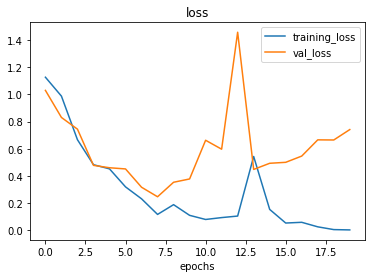

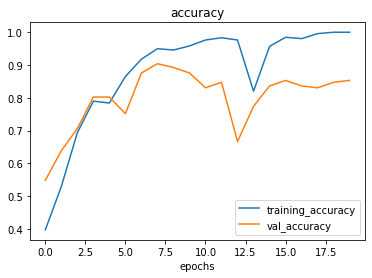

In [ ]:
plot_loss_curves(history_10)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_11 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_11.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_11 = model_11.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
23/23 [==============================] - 4s 158ms/step - loss: 1.2851 - accuracy: 0.3231 - val_loss: 1.0929 - val_accuracy: 0.3164
Epoch 2/20
23/23 [==============================] - 3s 141ms/step - loss: 1.0412 - accuracy: 0.4540 - val_loss: 1.0417 - val_accuracy: 0.3616
Epoch 3/20
23/23 [==============================] - 3s 141ms/step - loss: 0.7359 - accuracy: 0.6671 - val_loss: 0.6257 - val_accuracy: 0.7062
Epoch 4/20
23/23 [==============================] - 3s 140ms/step - loss: 0.5819 - accuracy: 0.7409 - val_loss: 0.4937 - val_accuracy: 0.7571
Epoch 5/20
23/23 [==============================] - 3s 141ms/step - loss: 0.3379 - accuracy: 0.8621 - val_loss: 0.5248 - val_accuracy: 0.7966
Epoch 6/20
23/23 [==============================] - 3s 142ms/step - loss: 0.2431 - accuracy: 0.8914 - val_loss: 0.5026 - val_accuracy: 0.7627
Epoch 7/20
23/23 [==============================] - 3s 140ms/step - loss: 0.2349 - accuracy: 0.9248 - val_loss: 0.5448 - val_accuracy: 0.7740
Epoch 

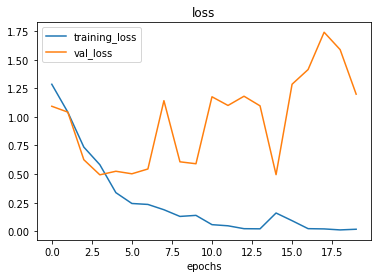

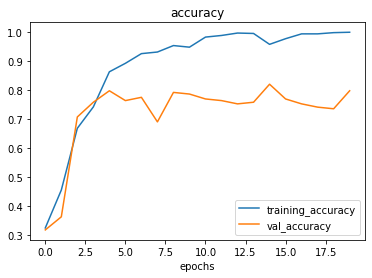

In [ ]:
plot_loss_curves(history_11)

ok, got overfitting

## Augmented data

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical",
                                                                    shuffle=True)

# Create non_augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="categorical")

Augmented training data
Found 718 images belonging to 3 classes.
Non-augmented training data:
Found 718 images belonging to 3 classes.
Non-augmented test data:
Found 177 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_12 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_12.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_12 = model_12.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
23/23 [==============================] - 11s 467ms/step - loss: 1.1157 - accuracy: 0.3092 - val_loss: 1.0968 - val_accuracy: 0.3333
Epoch 2/20
23/23 [==============================] - 10s 464ms/step - loss: 1.0794 - accuracy: 0.4331 - val_loss: 1.0064 - val_accuracy: 0.6045
Epoch 3/20
23/23 [==============================] - 10s 464ms/step - loss: 1.0290 - accuracy: 0.4735 - val_loss: 0.9261 - val_accuracy: 0.5141
Epoch 4/20
23/23 [==============================] - 11s 455ms/step - loss: 0.8788 - accuracy: 0.6226 - val_loss: 0.6987 - val_accuracy: 0.6554
Epoch 5/20
23/23 [==============================] - 10s 450ms/step - loss: 0.7507 - accuracy: 0.7061 - val_loss: 0.3343 - val_accuracy: 0.9322
Epoch 6/20
23/23 [==============================] - 10s 451ms/step - loss: 0.4792 - accuracy: 0.8148 - val_loss: 0.2019 - val_accuracy: 0.9661
Epoch 7/20
23/23 [==============================] - 11s 456ms/step - loss: 0.3864 - accuracy: 0.8482 - val_loss: 0.1130 - val_accuracy: 0.9661

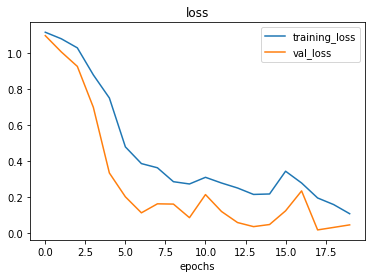

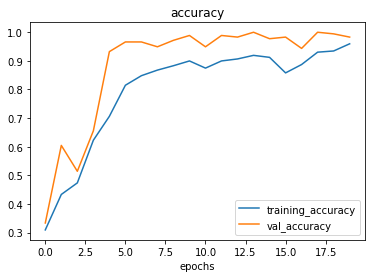

In [ ]:
plot_loss_curves(history_12)

In [ ]:
model_12.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_168 (Conv2D)         (None, 222, 222, 20)      560       
                                                                 
 activation_22 (Activation)  (None, 222, 222, 20)      0         
                                                                 
 conv2d_169 (Conv2D)         (None, 220, 220, 20)      3620      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 110, 110, 20)     0         
 g2D)                                                            
                                                                 
 conv2d_170 (Conv2D)         (None, 108, 108, 20)      3620      
                                                                 
 conv2d_171 (Conv2D)         (None, 106, 106, 20)      3620      
                                                     

Add another maxpool layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_13 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_13.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_13 = model_13.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
23/23 [==============================] - 12s 486ms/step - loss: 1.1048 - accuracy: 0.3273 - val_loss: 1.0908 - val_accuracy: 0.3390
Epoch 2/20
23/23 [==============================] - 10s 451ms/step - loss: 1.0777 - accuracy: 0.4206 - val_loss: 0.8176 - val_accuracy: 0.6949
Epoch 3/20
23/23 [==============================] - 11s 455ms/step - loss: 0.9306 - accuracy: 0.5557 - val_loss: 0.7548 - val_accuracy: 0.6441
Epoch 4/20
23/23 [==============================] - 10s 448ms/step - loss: 0.7768 - accuracy: 0.6588 - val_loss: 0.6064 - val_accuracy: 0.7684
Epoch 5/20
23/23 [==============================] - 10s 450ms/step - loss: 0.6666 - accuracy: 0.7117 - val_loss: 0.4024 - val_accuracy: 0.8870
Epoch 6/20
23/23 [==============================] - 10s 453ms/step - loss: 0.5023 - accuracy: 0.7799 - val_loss: 0.2007 - val_accuracy: 0.9492
Epoch 7/20
23/23 [==============================] - 12s 509ms/step - loss: 0.3564 - accuracy: 0.8552 - val_loss: 0.1149 - val_accuracy: 0.9718

Looks really promising!

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_13 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_13.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_13 = model_13.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
23/23 [==============================] - 12s 482ms/step - loss: 1.0997 - accuracy: 0.3175 - val_loss: 1.0959 - val_accuracy: 0.3446
Epoch 2/20
23/23 [==============================] - 10s 450ms/step - loss: 1.0965 - accuracy: 0.3747 - val_loss: 1.0762 - val_accuracy: 0.3333
Epoch 3/20
23/23 [==============================] - 10s 453ms/step - loss: 1.0560 - accuracy: 0.4304 - val_loss: 0.9677 - val_accuracy: 0.6102
Epoch 4/20
23/23 [==============================] - 10s 454ms/step - loss: 0.9395 - accuracy: 0.5808 - val_loss: 0.6113 - val_accuracy: 0.8023
Epoch 5/20
23/23 [==============================] - 10s 449ms/step - loss: 0.6898 - accuracy: 0.7423 - val_loss: 0.2784 - val_accuracy: 0.9096
Epoch 6/20
23/23 [==============================] - 11s 455ms/step - loss: 0.6101 - accuracy: 0.7577 - val_loss: 0.2840 - val_accuracy: 0.9379
Epoch 7/20
23/23 [==============================] - 11s 463ms/step - loss: 0.3749 - accuracy: 0.8524 - val_loss: 0.0836 - val_accuracy: 0.9774

Reducing epochs from 20 to 10

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_14 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_14.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_14 = model_14.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
23/23 [==============================] - 11s 482ms/step - loss: 1.0969 - accuracy: 0.3412 - val_loss: 1.0768 - val_accuracy: 0.3955
Epoch 2/10
23/23 [==============================] - 11s 456ms/step - loss: 1.0147 - accuracy: 0.5223 - val_loss: 0.7833 - val_accuracy: 0.6949
Epoch 3/10
23/23 [==============================] - 11s 468ms/step - loss: 0.8678 - accuracy: 0.5808 - val_loss: 0.7761 - val_accuracy: 0.6667
Epoch 4/10
23/23 [==============================] - 10s 446ms/step - loss: 0.7154 - accuracy: 0.6379 - val_loss: 0.6302 - val_accuracy: 0.6554
Epoch 5/10
23/23 [==============================] - 10s 450ms/step - loss: 0.6388 - accuracy: 0.6727 - val_loss: 0.7698 - val_accuracy: 0.6893
Epoch 6/10
23/23 [==============================] - 10s 446ms/step - loss: 0.5564 - accuracy: 0.7284 - val_loss: 0.4772 - val_accuracy: 0.8531
Epoch 7/10
23/23 [==============================] - 10s 447ms/step - loss: 0.4831 - accuracy: 0.7493 - val_loss: 0.4357 - val_accuracy: 0.7006

20 epochs, but one less maxpool layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_15 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(3, activation='softmax') # Changed to have 3 output neurons and have the softmax activation function
])

# Compile the model
model_15.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_15 = model_15.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
23/23 [==============================] - 13s 519ms/step - loss: 1.0978 - accuracy: 0.3496 - val_loss: 1.0715 - val_accuracy: 0.4576
Epoch 2/20
23/23 [==============================] - 14s 598ms/step - loss: 1.0121 - accuracy: 0.5265 - val_loss: 0.7815 - val_accuracy: 0.8079
Epoch 3/20
23/23 [==============================] - 11s 488ms/step - loss: 0.8097 - accuracy: 0.6226 - val_loss: 0.8027 - val_accuracy: 0.6610
Epoch 4/20
23/23 [==============================] - 11s 453ms/step - loss: 0.6923 - accuracy: 0.6811 - val_loss: 0.4823 - val_accuracy: 0.8588
Epoch 5/20
23/23 [==============================] - 11s 490ms/step - loss: 0.5147 - accuracy: 0.7396 - val_loss: 0.3842 - val_accuracy: 0.8870
Epoch 6/20
23/23 [==============================] - 11s 459ms/step - loss: 0.4842 - accuracy: 0.7256 - val_loss: 0.4186 - val_accuracy: 0.7345
Epoch 7/20
23/23 [==============================] - 11s 497ms/step - loss: 0.4475 - accuracy: 0.7772 - val_loss: 0.3202 - val_accuracy: 0.9322

##Four people

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

# Walk through the Handwriting_Sample directory and list number fo files
for dirpath, dirnames, filenames in os.walk("gdrive/MyDrive/Multi_Class_Handwriting_Samples"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples
There are 4 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/anatoli
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/ksenia
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/yulia
There are 0 directories and 60 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/douglas
There are 4 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train
There are 0 directories and 239 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/anatoli
There are 0 directories and 240 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/ksenia
There are 0 directories and 239 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/yulia
There are 0

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("gdrive/MyDrive/Multi_Class_Handwriting_Samples/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirectory
print(class_names)

['anatoli' 'douglas' 'ksenia' 'yulia']


In [ ]:
# Define directory dataset paths
train_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/"
test_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/"

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical",
                                                                    shuffle=True)

# Create non_augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="categorical")

Augmented training data
Found 958 images belonging to 4 classes.
Non-augmented training data:
Found 958 images belonging to 4 classes.
Non-augmented test data:
Found 237 images belonging to 4 classes.


In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training curves seperately
def plot_loss_curves(history):
  # Returns seperate loss curves for training and validation metrics
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_16 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # Changed to have 4 output neurons and have the softmax activation function
])

# Compile the model
model_16.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_16 = model_16.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
30/30 [==============================] - 5s 139ms/step - loss: 1.2939 - accuracy: 0.3528 - val_loss: 1.0790 - val_accuracy: 0.4430
Epoch 2/5
30/30 [==============================] - 5s 154ms/step - loss: 0.8539 - accuracy: 0.6284 - val_loss: 0.6065 - val_accuracy: 0.7806
Epoch 3/5
30/30 [==============================] - 4s 128ms/step - loss: 0.3613 - accuracy: 0.8695 - val_loss: 0.3713 - val_accuracy: 0.8565
Epoch 4/5
30/30 [==============================] - 4s 126ms/step - loss: 0.2669 - accuracy: 0.8977 - val_loss: 0.4175 - val_accuracy: 0.8776
Epoch 5/5
30/30 [==============================] - 4s 125ms/step - loss: 0.1280 - accuracy: 0.9603 - val_loss: 0.4264 - val_accuracy: 0.8397


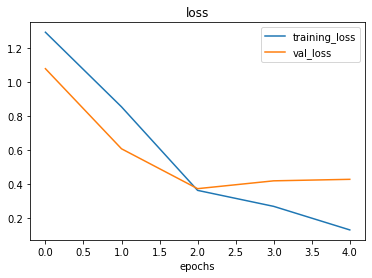

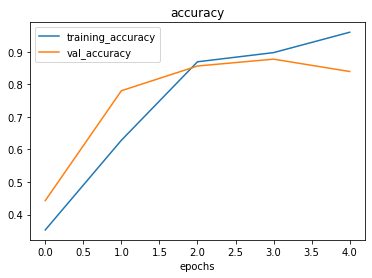

In [ ]:
plot_loss_curves(history_16)

First time around, around 83% accuracy

Added two conv layers and a maxpool layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_17 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # Changed to have 4 output neurons and have the softmax activation function
])

# Compile the model
model_17.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_17 = model_17.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
30/30 [==============================] - 5s 137ms/step - loss: 1.2658 - accuracy: 0.4624 - val_loss: 0.8521 - val_accuracy: 0.7215
Epoch 2/5
30/30 [==============================] - 4s 128ms/step - loss: 0.6198 - accuracy: 0.7745 - val_loss: 0.4019 - val_accuracy: 0.8354
Epoch 3/5
30/30 [==============================] - 4s 140ms/step - loss: 0.3706 - accuracy: 0.8486 - val_loss: 0.4670 - val_accuracy: 0.7890
Epoch 4/5
30/30 [==============================] - 4s 144ms/step - loss: 0.2663 - accuracy: 0.8977 - val_loss: 0.3382 - val_accuracy: 0.8776
Epoch 5/5
30/30 [==============================] - 4s 129ms/step - loss: 0.1372 - accuracy: 0.9572 - val_loss: 0.3036 - val_accuracy: 0.8861


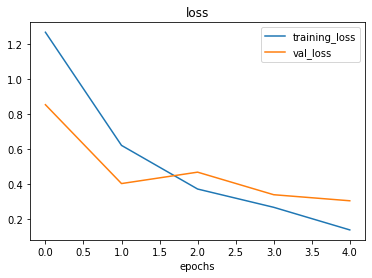

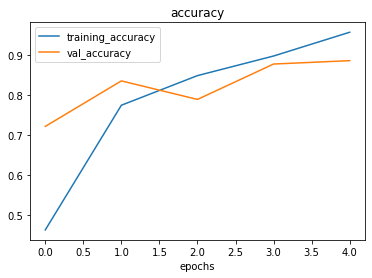

In [ ]:
plot_loss_curves(history_17)

Increased filters from 10 to 15

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_18 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # Changed to have 4 output neurons and have the softmax activation function
])

# Compile the model
model_18.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_18 = model_18.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
30/30 [==============================] - 6s 166ms/step - loss: 1.3496 - accuracy: 0.2860 - val_loss: 1.1454 - val_accuracy: 0.4304
Epoch 2/5
30/30 [==============================] - 4s 131ms/step - loss: 0.8266 - accuracy: 0.6555 - val_loss: 0.6177 - val_accuracy: 0.7637
Epoch 3/5
30/30 [==============================] - 4s 131ms/step - loss: 0.4401 - accuracy: 0.8330 - val_loss: 0.6087 - val_accuracy: 0.7384
Epoch 4/5
30/30 [==============================] - 4s 139ms/step - loss: 0.3172 - accuracy: 0.8935 - val_loss: 0.1971 - val_accuracy: 0.9283
Epoch 5/5
30/30 [==============================] - 5s 173ms/step - loss: 0.2295 - accuracy: 0.9123 - val_loss: 0.2226 - val_accuracy: 0.9283


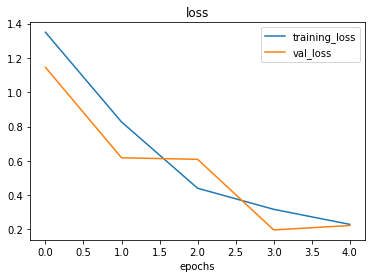

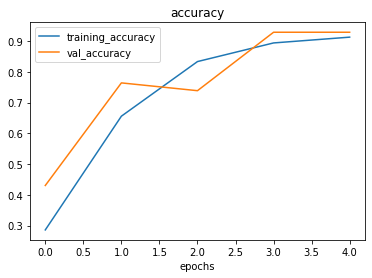

In [ ]:
plot_loss_curves(history_18)

Increase filters from 15 to 20

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_19 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # Changed to have 4 output neurons and have the softmax activation function
])

# Compile the model
model_19.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_19 = model_19.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
30/30 [==============================] - 5s 136ms/step - loss: 1.2752 - accuracy: 0.3278 - val_loss: 0.8704 - val_accuracy: 0.7046
Epoch 2/5
30/30 [==============================] - 4s 130ms/step - loss: 0.6889 - accuracy: 0.7171 - val_loss: 0.6692 - val_accuracy: 0.6540
Epoch 3/5
30/30 [==============================] - 4s 134ms/step - loss: 0.5470 - accuracy: 0.7850 - val_loss: 0.4923 - val_accuracy: 0.7722
Epoch 4/5
30/30 [==============================] - 4s 134ms/step - loss: 0.3792 - accuracy: 0.8737 - val_loss: 0.2832 - val_accuracy: 0.8987
Epoch 5/5
30/30 [==============================] - 4s 130ms/step - loss: 0.2271 - accuracy: 0.9207 - val_loss: 0.2389 - val_accuracy: 0.9156


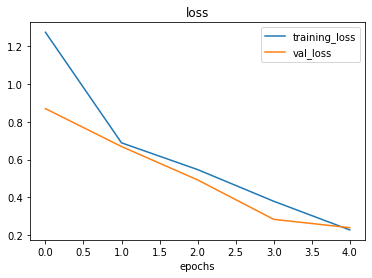

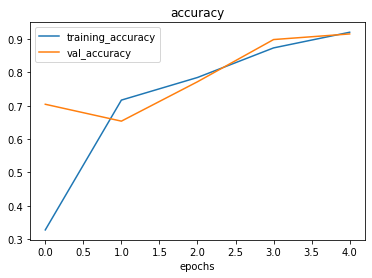

In [ ]:
plot_loss_curves(history_19)

Not really an improvement, but still high accuracy

Although the accuracy is higher, this run seems to have less similarity between  the curves (we want them to be as close as possible)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_20 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # Changed to have 4 output neurons and have the softmax activation function
])

# Compile the model
model_20.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_20 = model_20.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
30/30 [==============================] - 5s 137ms/step - loss: 1.3287 - accuracy: 0.2829 - val_loss: 1.0900 - val_accuracy: 0.4810
Epoch 2/10
30/30 [==============================] - 4s 130ms/step - loss: 0.8196 - accuracy: 0.6806 - val_loss: 0.5587 - val_accuracy: 0.7848
Epoch 3/10
30/30 [==============================] - 4s 129ms/step - loss: 0.6182 - accuracy: 0.7537 - val_loss: 0.5410 - val_accuracy: 0.8186
Epoch 4/10
30/30 [==============================] - 4s 130ms/step - loss: 0.3661 - accuracy: 0.8810 - val_loss: 0.2205 - val_accuracy: 0.9241
Epoch 5/10
30/30 [==============================] - 4s 127ms/step - loss: 0.3346 - accuracy: 0.8810 - val_loss: 0.2881 - val_accuracy: 0.9156
Epoch 6/10
30/30 [==============================] - 4s 129ms/step - loss: 0.1905 - accuracy: 0.9353 - val_loss: 0.1868 - val_accuracy: 0.9283
Epoch 7/10
30/30 [==============================] - 4s 131ms/step - loss: 0.0950 - accuracy: 0.9645 - val_loss: 0.1166 - val_accuracy: 0.9536
Epoch 

accuracy remained roughly the same - probably not worth running for 10 epochs

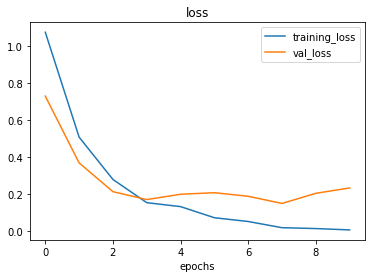

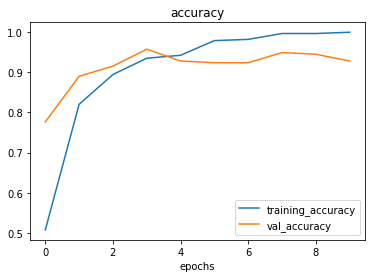

In [ ]:
plot_loss_curves(history_20)

Might try overfitting again and then adding another maxpool layers - let's see if it works

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_21 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # Changed to have 4 output neurons
])

# Compile the model
model_21.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_21 = model_21.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
30/30 [==============================] - 5s 138ms/step - loss: 1.2905 - accuracy: 0.2985 - val_loss: 1.0828 - val_accuracy: 0.5232
Epoch 2/20
30/30 [==============================] - 4s 127ms/step - loss: 0.7840 - accuracy: 0.7328 - val_loss: 0.4100 - val_accuracy: 0.8354
Epoch 3/20
30/30 [==============================] - 4s 128ms/step - loss: 0.3319 - accuracy: 0.8664 - val_loss: 0.4419 - val_accuracy: 0.7890
Epoch 4/20
30/30 [==============================] - 4s 131ms/step - loss: 0.2112 - accuracy: 0.9259 - val_loss: 0.2301 - val_accuracy: 0.8945
Epoch 5/20
30/30 [==============================] - 4s 130ms/step - loss: 0.1206 - accuracy: 0.9551 - val_loss: 0.2224 - val_accuracy: 0.9283
Epoch 6/20
30/30 [==============================] - 4s 132ms/step - loss: 0.1467 - accuracy: 0.9436 - val_loss: 0.3685 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 4s 129ms/step - loss: 0.0967 - accuracy: 0.9676 - val_loss: 0.1598 - val_accuracy: 0.9451
Epoch 

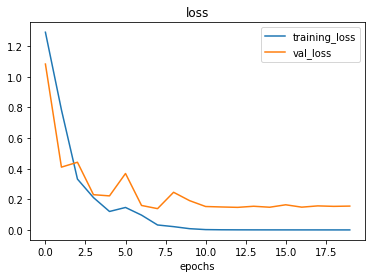

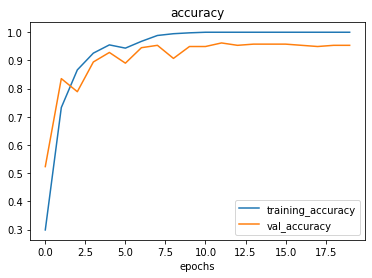

In [ ]:
plot_loss_curves(history_21)

From graph, can see that after 15 epochs accuracy basically remains the same so maybe only worth running up to that point

Increasing number of convolutional layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_22 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # Changed to have 4 output neurons
])

# Compile the model
model_22.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_22 = model_22.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
30/30 [==============================] - 5s 141ms/step - loss: 1.3533 - accuracy: 0.2724 - val_loss: 1.0995 - val_accuracy: 0.6329
Epoch 2/15
30/30 [==============================] - 4s 132ms/step - loss: 0.9654 - accuracy: 0.6493 - val_loss: 0.7615 - val_accuracy: 0.6793
Epoch 3/15
30/30 [==============================] - 4s 135ms/step - loss: 0.6011 - accuracy: 0.7818 - val_loss: 0.5197 - val_accuracy: 0.7932
Epoch 4/15
30/30 [==============================] - 4s 135ms/step - loss: 0.3248 - accuracy: 0.8820 - val_loss: 0.2254 - val_accuracy: 0.9156
Epoch 5/15
30/30 [==============================] - 4s 132ms/step - loss: 0.1972 - accuracy: 0.9259 - val_loss: 0.2028 - val_accuracy: 0.9451
Epoch 6/15
30/30 [==============================] - 4s 133ms/step - loss: 0.0723 - accuracy: 0.9781 - val_loss: 0.1879 - val_accuracy: 0.9283
Epoch 7/15
30/30 [==============================] - 4s 134ms/step - loss: 0.0311 - accuracy: 0.9916 - val_loss: 0.1555 - val_accuracy: 0.9367
Epoch 

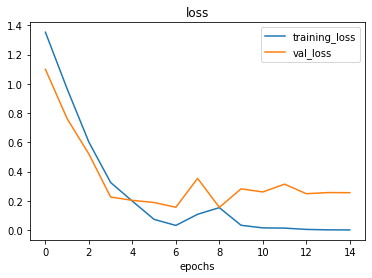

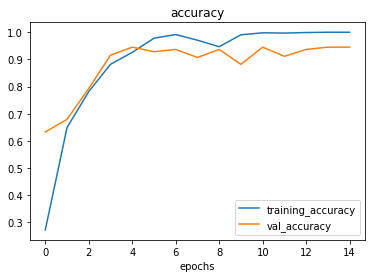

In [ ]:
plot_loss_curves(history_22)

Adding a maxpool layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_23 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # Changed to have 4 output neurons
])

# Compile the model
model_23.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_23 = model_23.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
30/30 [==============================] - 5s 144ms/step - loss: 1.1437 - accuracy: 0.4509 - val_loss: 0.7352 - val_accuracy: 0.6835
Epoch 2/15
30/30 [==============================] - 4s 132ms/step - loss: 0.4716 - accuracy: 0.8319 - val_loss: 0.5075 - val_accuracy: 0.7848
Epoch 3/15
30/30 [==============================] - 4s 135ms/step - loss: 0.3466 - accuracy: 0.8633 - val_loss: 0.3586 - val_accuracy: 0.8734
Epoch 4/15
30/30 [==============================] - 5s 162ms/step - loss: 0.2023 - accuracy: 0.9186 - val_loss: 0.3724 - val_accuracy: 0.8650
Epoch 5/15
30/30 [==============================] - 4s 134ms/step - loss: 0.1569 - accuracy: 0.9468 - val_loss: 0.1928 - val_accuracy: 0.9283
Epoch 6/15
30/30 [==============================] - 4s 141ms/step - loss: 0.1042 - accuracy: 0.9624 - val_loss: 0.2138 - val_accuracy: 0.9409
Epoch 7/15
30/30 [==============================] - 5s 148ms/step - loss: 0.0455 - accuracy: 0.9812 - val_loss: 0.2646 - val_accuracy: 0.9325
Epoch 

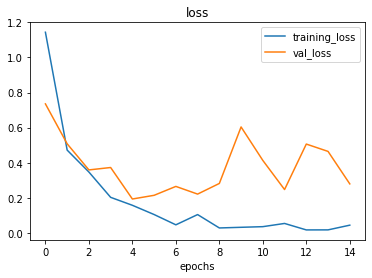

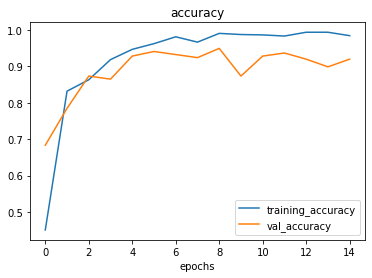

In [ ]:
plot_loss_curves(history_23)

OK can see there is some overfitting

## To try - augment data in different ways - see if that increases accuracy

Things I can add:
- brightness range
- Can change the values of all parameters already in use

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os

# Walk through the Handwriting_Sample directory and list number fo files
for dirpath, dirnames, filenames in os.walk("gdrive/MyDrive/Multi_Class_Handwriting_Samples"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("gdrive/MyDrive/Multi_Class_Handwriting_Samples/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirectory
print(class_names)

In [ ]:
# Define directory dataset paths
train_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/"
test_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/"

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.3,
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             brightness_range=0.2 # check this.........)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

## Five people

### Non-augmented

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

# Walk through the Handwriting_Sample directory and list number fo files
for dirpath, dirnames, filenames in os.walk("gdrive/MyDrive/Multi_Class_Handwriting_Samples"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples
There are 5 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/anatoli
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/ksenia
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/yulia
There are 0 directories and 60 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/douglas
There are 0 directories and 60 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/zhentao
There are 5 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train
There are 0 directories and 239 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/anatoli
There are 0 directories and 240 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/ksenia
There are 0

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("gdrive/MyDrive/Multi_Class_Handwriting_Samples/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirectory
print(class_names)

['anatoli' 'douglas' 'ksenia' 'yulia' 'zhentao']


In [ ]:
# Define directory dataset paths
train_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/"
test_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/"

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="categorical", # Type of data you're working with
                                               batch_size=32) # Size of minibatches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 1198 images belonging to 5 classes.
Found 297 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_24 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_24.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_24 = model_24.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
38/38 [==============================] - 531s 14s/step - loss: 1.2794 - accuracy: 0.4432 - val_loss: 0.8161 - val_accuracy: 0.6700
Epoch 2/5
38/38 [==============================] - 5s 124ms/step - loss: 0.6311 - accuracy: 0.7663 - val_loss: 0.9222 - val_accuracy: 0.5455
Epoch 3/5
38/38 [==============================] - 5s 129ms/step - loss: 0.3889 - accuracy: 0.8556 - val_loss: 0.6496 - val_accuracy: 0.7710
Epoch 4/5
38/38 [==============================] - 5s 123ms/step - loss: 0.2113 - accuracy: 0.9382 - val_loss: 0.6780 - val_accuracy: 0.7744
Epoch 5/5
38/38 [==============================] - 5s 124ms/step - loss: 0.3968 - accuracy: 0.8773 - val_loss: 0.6804 - val_accuracy: 0.7710


In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training curves seperately
def plot_loss_curves(history):
  # Returns seperate loss curves for training and validation metrics
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

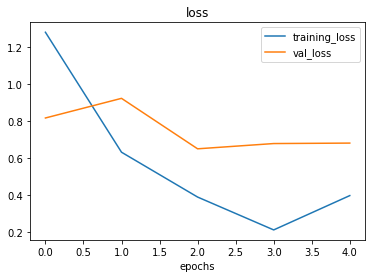

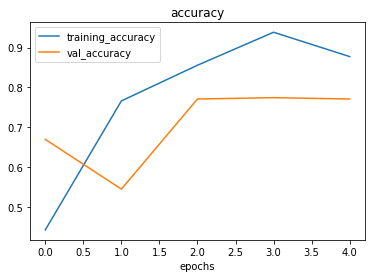

In [ ]:
plot_loss_curves(history_24)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_25 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_25.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_25 = model_25.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
38/38 [==============================] - 7s 142ms/step - loss: 1.4103 - accuracy: 0.3773 - val_loss: 0.9880 - val_accuracy: 0.6330
Epoch 2/5
38/38 [==============================] - 5s 127ms/step - loss: 0.7531 - accuracy: 0.7154 - val_loss: 0.7025 - val_accuracy: 0.7340
Epoch 3/5
38/38 [==============================] - 5s 127ms/step - loss: 0.4971 - accuracy: 0.8114 - val_loss: 0.6601 - val_accuracy: 0.7710
Epoch 4/5
38/38 [==============================] - 5s 125ms/step - loss: 0.2448 - accuracy: 0.9073 - val_loss: 0.8785 - val_accuracy: 0.7037
Epoch 5/5
38/38 [==============================] - 5s 128ms/step - loss: 0.1503 - accuracy: 0.9466 - val_loss: 0.7596 - val_accuracy: 0.7374


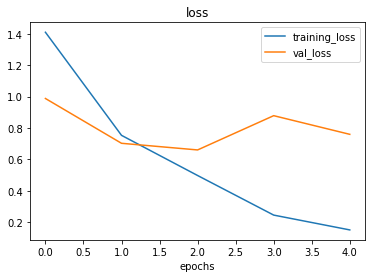

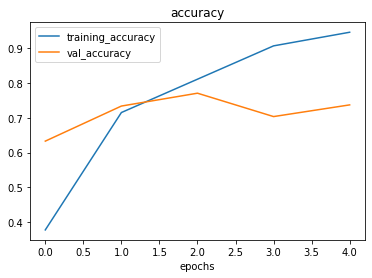

In [ ]:
plot_loss_curves(history_25)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_27 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_27.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_27 = model_27.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
38/38 [==============================] - 7s 146ms/step - loss: 1.6236 - accuracy: 0.3790 - val_loss: 1.0271 - val_accuracy: 0.5859
Epoch 2/10
38/38 [==============================] - 5s 130ms/step - loss: 0.7540 - accuracy: 0.7154 - val_loss: 1.0104 - val_accuracy: 0.6263
Epoch 3/10
38/38 [==============================] - 5s 129ms/step - loss: 0.4668 - accuracy: 0.8339 - val_loss: 0.6958 - val_accuracy: 0.7542
Epoch 4/10
38/38 [==============================] - 5s 130ms/step - loss: 0.2066 - accuracy: 0.9282 - val_loss: 0.6011 - val_accuracy: 0.7980
Epoch 5/10
38/38 [==============================] - 5s 129ms/step - loss: 0.1307 - accuracy: 0.9558 - val_loss: 0.6618 - val_accuracy: 0.7845
Epoch 6/10
38/38 [==============================] - 5s 131ms/step - loss: 0.0665 - accuracy: 0.9841 - val_loss: 0.7570 - val_accuracy: 0.7677
Epoch 7/10
38/38 [==============================] - 5s 130ms/step - loss: 0.0393 - accuracy: 0.9900 - val_loss: 0.8604 - val_accuracy: 0.7912
Epoch 

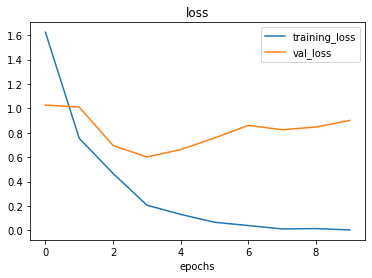

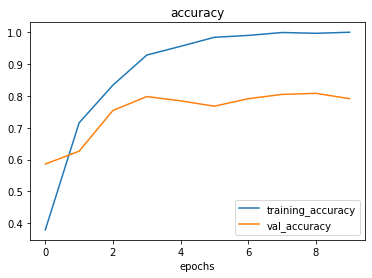

In [ ]:
plot_loss_curves(history_27)

### Augmented

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical",
                                                                    shuffle=True)

# Create non_augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="categorical")

Augmented training data
Found 1198 images belonging to 5 classes.
Non-augmented training data:
Found 1198 images belonging to 5 classes.
Non-augmented test data:
Found 297 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_26 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_26.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_26 = model_26.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
38/38 [==============================] - 17s 426ms/step - loss: 1.5998 - accuracy: 0.2679 - val_loss: 1.1743 - val_accuracy: 0.5623
Epoch 2/5
38/38 [==============================] - 16s 428ms/step - loss: 1.1617 - accuracy: 0.4900 - val_loss: 0.9509 - val_accuracy: 0.5892
Epoch 3/5
38/38 [==============================] - 16s 422ms/step - loss: 0.9216 - accuracy: 0.6260 - val_loss: 0.6372 - val_accuracy: 0.7643
Epoch 4/5
38/38 [==============================] - 17s 454ms/step - loss: 0.7506 - accuracy: 0.6861 - val_loss: 0.5947 - val_accuracy: 0.7643
Epoch 5/5
38/38 [==============================] - 16s 422ms/step - loss: 0.5709 - accuracy: 0.7588 - val_loss: 0.4323 - val_accuracy: 0.8451


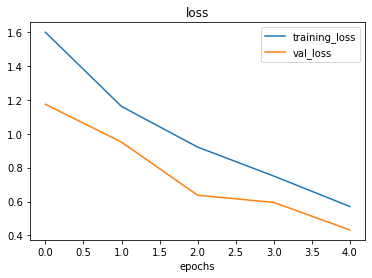

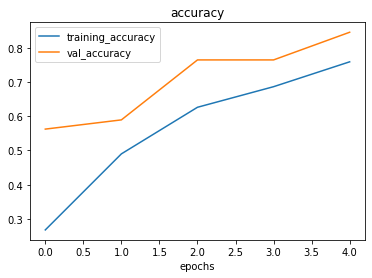

In [ ]:
plot_loss_curves(history_26)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_28 = Sequential([
    Conv2D(20, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation='relu'),
    Conv2D(20, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_28.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_28 = model_28.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
38/38 [==============================] - 17s 444ms/step - loss: 1.3934 - accuracy: 0.3806 - val_loss: 1.0807 - val_accuracy: 0.5421
Epoch 2/10
38/38 [==============================] - 16s 427ms/step - loss: 0.9609 - accuracy: 0.6002 - val_loss: 0.7402 - val_accuracy: 0.7003
Epoch 3/10
38/38 [==============================] - 17s 435ms/step - loss: 0.6603 - accuracy: 0.7254 - val_loss: 0.3796 - val_accuracy: 0.8721
Epoch 4/10
38/38 [==============================] - 16s 432ms/step - loss: 0.5152 - accuracy: 0.8080 - val_loss: 0.4838 - val_accuracy: 0.8249
Epoch 5/10
38/38 [==============================] - 16s 427ms/step - loss: 0.4292 - accuracy: 0.8347 - val_loss: 0.1980 - val_accuracy: 0.9529
Epoch 6/10
38/38 [==============================] - 17s 438ms/step - loss: 0.3395 - accuracy: 0.8831 - val_loss: 0.4687 - val_accuracy: 0.8519
Epoch 7/10
38/38 [==============================] - 16s 421ms/step - loss: 0.3264 - accuracy: 0.8806 - val_loss: 0.2885 - val_accuracy: 0.9057

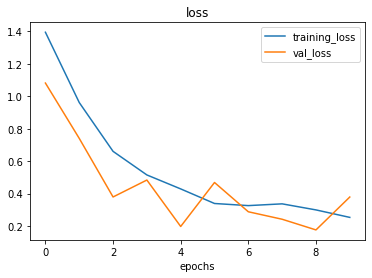

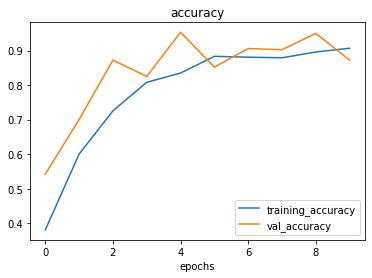

In [ ]:
plot_loss_curves(history_28)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_29 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_29.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_29 = model_29.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
38/38 [==============================] - 17s 433ms/step - loss: 1.5604 - accuracy: 0.2504 - val_loss: 1.3462 - val_accuracy: 0.4545
Epoch 2/10
38/38 [==============================] - 16s 422ms/step - loss: 1.3421 - accuracy: 0.4132 - val_loss: 1.2100 - val_accuracy: 0.3771
Epoch 3/10
38/38 [==============================] - 16s 424ms/step - loss: 0.9625 - accuracy: 0.6110 - val_loss: 0.6239 - val_accuracy: 0.8215
Epoch 4/10
38/38 [==============================] - 17s 455ms/step - loss: 0.6123 - accuracy: 0.7679 - val_loss: 0.3405 - val_accuracy: 0.8788
Epoch 5/10
38/38 [==============================] - 16s 429ms/step - loss: 0.5838 - accuracy: 0.7763 - val_loss: 0.4248 - val_accuracy: 0.8350
Epoch 6/10
38/38 [==============================] - 16s 427ms/step - loss: 0.4153 - accuracy: 0.8539 - val_loss: 0.3343 - val_accuracy: 0.8485
Epoch 7/10
38/38 [==============================] - 16s 424ms/step - loss: 0.3930 - accuracy: 0.8497 - val_loss: 0.1834 - val_accuracy: 0.9293

ok this can definitely go above 94%

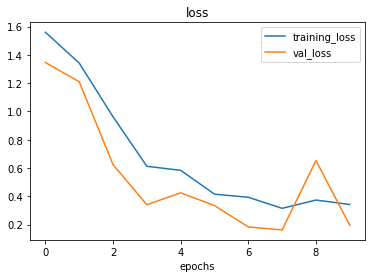

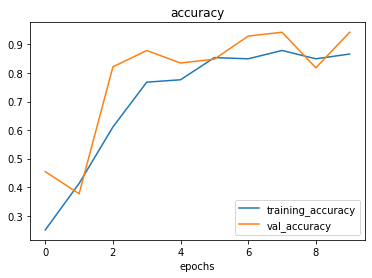

In [ ]:
plot_loss_curves(history_29)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_30 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_30.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_30 = model_30.fit(train_data_augmented,
                        epochs=7,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/7
38/38 [==============================] - 17s 427ms/step - loss: 1.6100 - accuracy: 0.2162 - val_loss: 1.4135 - val_accuracy: 0.2963
Epoch 2/7
38/38 [==============================] - 16s 422ms/step - loss: 1.3471 - accuracy: 0.4424 - val_loss: 1.1282 - val_accuracy: 0.5286
Epoch 3/7
38/38 [==============================] - 16s 421ms/step - loss: 1.1162 - accuracy: 0.5868 - val_loss: 1.0477 - val_accuracy: 0.5152
Epoch 4/7
38/38 [==============================] - 16s 421ms/step - loss: 1.0127 - accuracy: 0.6436 - val_loss: 1.0300 - val_accuracy: 0.6431
Epoch 5/7
38/38 [==============================] - 16s 431ms/step - loss: 0.6772 - accuracy: 0.7554 - val_loss: 0.4303 - val_accuracy: 0.8249
Epoch 6/7
38/38 [==============================] - 16s 425ms/step - loss: 0.4662 - accuracy: 0.8306 - val_loss: 0.4642 - val_accuracy: 0.7778
Epoch 7/7
38/38 [==============================] - 16s 421ms/step - loss: 0.4296 - accuracy: 0.8389 - val_loss: 0.3843 - val_accuracy: 0.8418


### Varying the augmented data

# New section

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

# Walk through the Handwriting_Sample directory and list number fo files
for dirpath, dirnames, filenames in os.walk("gdrive/MyDrive/Multi_Class_Handwriting_Samples"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples
There are 5 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/anatoli
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/ksenia
There are 0 directories and 59 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/yulia
There are 0 directories and 60 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/douglas
There are 0 directories and 60 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/zhentao
There are 5 directories and 0 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train
There are 0 directories and 239 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/anatoli
There are 0 directories and 240 images in 'gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/ksenia
There are 0

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("gdrive/MyDrive/Multi_Class_Handwriting_Samples/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirectory
print(class_names)

['anatoli' 'douglas' 'ksenia' 'yulia' 'zhentao']


In [ ]:
# Define directory dataset paths
train_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/"
test_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/"

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented_2 = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             brightness_range=(0.8,1.2))

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented_2 = train_datagen_augmented_2.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical",
                                                                    shuffle=True)

# Create non_augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="categorical")

Augmented training data
Found 1198 images belonging to 5 classes.
Non-augmented training data:
Found 1198 images belonging to 5 classes.
Non-augmented test data:
Found 297 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_31 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_31.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_31 = model_31.fit(train_data_augmented_2,
                        epochs=7,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/7
38/38 [==============================] - 1041s 27s/step - loss: 1.5012 - accuracy: 0.3339 - val_loss: 1.1020 - val_accuracy: 0.4949
Epoch 2/7
38/38 [==============================] - 17s 453ms/step - loss: 1.1987 - accuracy: 0.4850 - val_loss: 0.9849 - val_accuracy: 0.5960
Epoch 3/7
38/38 [==============================] - 17s 451ms/step - loss: 0.9865 - accuracy: 0.5726 - val_loss: 0.6468 - val_accuracy: 0.7744
Epoch 4/7
38/38 [==============================] - 17s 448ms/step - loss: 0.7911 - accuracy: 0.6720 - val_loss: 0.5524 - val_accuracy: 0.8215
Epoch 5/7
38/38 [==============================] - 17s 452ms/step - loss: 0.6923 - accuracy: 0.7020 - val_loss: 0.5291 - val_accuracy: 0.7778
Epoch 6/7
38/38 [==============================] - 17s 448ms/step - loss: 0.6408 - accuracy: 0.7262 - val_loss: 0.4251 - val_accuracy: 0.8451
Epoch 7/7
38/38 [==============================] - 17s 448ms/step - loss: 0.5358 - accuracy: 0.7838 - val_loss: 0.4906 - val_accuracy: 0.7879


Brightness change seems to worsen it

Also increased the time for training the model greatly

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented_3 = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             )

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented_3 = train_datagen_augmented_3.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical",
                                                                    shuffle=True)

# Create non_augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="categorical")

Augmented training data
Found 1198 images belonging to 5 classes.
Non-augmented training data:
Found 1198 images belonging to 5 classes.
Non-augmented test data:
Found 297 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_32 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_32.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_32 = model_32.fit(train_data_augmented_3,
                        epochs=7,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/7
38/38 [==============================] - 17s 447ms/step - loss: 1.5229 - accuracy: 0.3397 - val_loss: 1.0361 - val_accuracy: 0.4983
Epoch 2/7
38/38 [==============================] - 19s 493ms/step - loss: 1.0552 - accuracy: 0.5309 - val_loss: 0.8352 - val_accuracy: 0.6633
Epoch 3/7
38/38 [==============================] - 17s 434ms/step - loss: 0.8952 - accuracy: 0.6127 - val_loss: 0.8612 - val_accuracy: 0.6532
Epoch 4/7
38/38 [==============================] - 17s 433ms/step - loss: 0.7473 - accuracy: 0.6912 - val_loss: 0.5216 - val_accuracy: 0.7811
Epoch 5/7
38/38 [==============================] - 16s 431ms/step - loss: 0.5746 - accuracy: 0.7638 - val_loss: 0.5873 - val_accuracy: 0.7643
Epoch 6/7
38/38 [==============================] - 17s 433ms/step - loss: 0.5000 - accuracy: 0.8139 - val_loss: 0.5366 - val_accuracy: 0.8114
Epoch 7/7
38/38 [==============================] - 17s 433ms/step - loss: 0.4455 - accuracy: 0.8372 - val_loss: 0.2475 - val_accuracy: 0.9091


In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training curves seperately
def plot_loss_curves(history):
  # Returns seperate loss curves for training and validation metrics
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

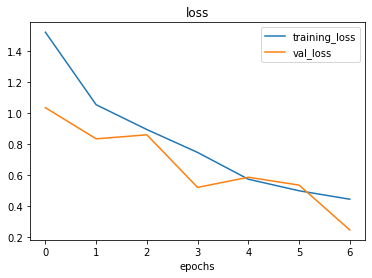

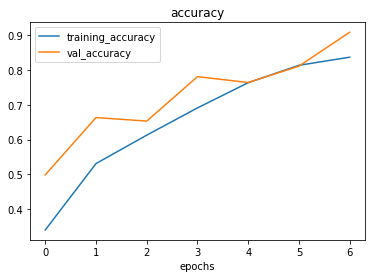

In [ ]:
plot_loss_curves(history_32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_33 = Sequential([
    Conv2D(15, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_33.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_33 = model_33.fit(train_data_augmented_3,
                        epochs=12,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/12
38/38 [==============================] - 17s 440ms/step - loss: 1.6284 - accuracy: 0.2713 - val_loss: 1.2974 - val_accuracy: 0.3872
Epoch 2/12
38/38 [==============================] - 17s 435ms/step - loss: 1.1959 - accuracy: 0.4508 - val_loss: 1.0522 - val_accuracy: 0.4276
Epoch 3/12
38/38 [==============================] - 17s 440ms/step - loss: 1.0338 - accuracy: 0.5643 - val_loss: 0.9475 - val_accuracy: 0.5589
Epoch 4/12
38/38 [==============================] - 17s 449ms/step - loss: 0.8770 - accuracy: 0.6319 - val_loss: 0.7422 - val_accuracy: 0.6801
Epoch 5/12
38/38 [==============================] - 16s 433ms/step - loss: 0.7017 - accuracy: 0.7245 - val_loss: 0.4597 - val_accuracy: 0.8384
Epoch 6/12
38/38 [==============================] - 17s 450ms/step - loss: 0.6060 - accuracy: 0.7788 - val_loss: 0.4372 - val_accuracy: 0.8620
Epoch 7/12
38/38 [==============================] - 20s 517ms/step - loss: 0.4927 - accuracy: 0.8147 - val_loss: 0.3089 - val_accuracy: 0.9091

### Test: Decreasing kernel size

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_34 = Sequential([
    Conv2D(15, 2, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(15, 2, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 2, activation='relu'),
    Conv2D(15, 2, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_34.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_34 = model_34.fit(train_data_augmented_3,
                        epochs=12,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/12
38/38 [==============================] - 298s 8s/step - loss: 1.6084 - accuracy: 0.2204 - val_loss: 1.3962 - val_accuracy: 0.2290
Epoch 2/12
38/38 [==============================] - 16s 414ms/step - loss: 1.4120 - accuracy: 0.4090 - val_loss: 1.3259 - val_accuracy: 0.3603
Epoch 3/12
38/38 [==============================] - 16s 413ms/step - loss: 1.3223 - accuracy: 0.4866 - val_loss: 1.2227 - val_accuracy: 0.5455
Epoch 4/12
38/38 [==============================] - 16s 415ms/step - loss: 1.0727 - accuracy: 0.6068 - val_loss: 0.7713 - val_accuracy: 0.7239
Epoch 5/12
38/38 [==============================] - 16s 412ms/step - loss: 0.6935 - accuracy: 0.7387 - val_loss: 0.6818 - val_accuracy: 0.7374
Epoch 6/12
38/38 [==============================] - 16s 408ms/step - loss: 0.5854 - accuracy: 0.7755 - val_loss: 0.6153 - val_accuracy: 0.7744
Epoch 7/12
38/38 [==============================] - 16s 410ms/step - loss: 0.5522 - accuracy: 0.7788 - val_loss: 0.5753 - val_accuracy: 0.7643
E

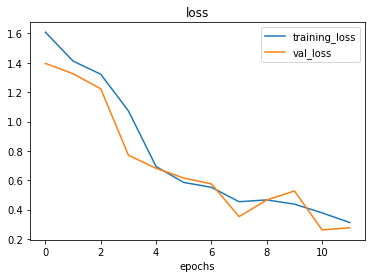

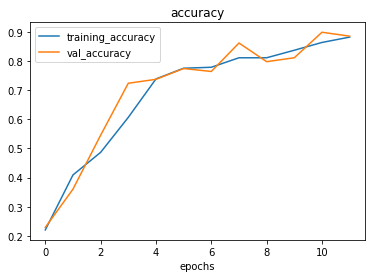

In [ ]:
plot_loss_curves(history_34)

The curved are very close which is good

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_35 = Sequential([
    Conv2D(15, 2, input_shape=(224,224,3), padding='same'),
    Activation(activation='relu'),
    Conv2D(15, 2, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(15, 2, activation='relu', padding='same'),
    Conv2D(15, 2, activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_35.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_35 = model_35.fit(train_data_augmented_3,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
38/38 [==============================] - 17s 423ms/step - loss: 1.8639 - accuracy: 0.2321 - val_loss: 1.5070 - val_accuracy: 0.2155
Epoch 2/20
38/38 [==============================] - 16s 409ms/step - loss: 1.4240 - accuracy: 0.3856 - val_loss: 1.1667 - val_accuracy: 0.3973
Epoch 3/20
38/38 [==============================] - 16s 413ms/step - loss: 1.0615 - accuracy: 0.5359 - val_loss: 0.8637 - val_accuracy: 0.5758
Epoch 4/20
38/38 [==============================] - 16s 408ms/step - loss: 0.9379 - accuracy: 0.6002 - val_loss: 1.0239 - val_accuracy: 0.5926
Epoch 5/20
38/38 [==============================] - 16s 407ms/step - loss: 0.8273 - accuracy: 0.6720 - val_loss: 0.6847 - val_accuracy: 0.6936
Epoch 6/20
38/38 [==============================] - 17s 442ms/step - loss: 0.7005 - accuracy: 0.7479 - val_loss: 0.5736 - val_accuracy: 0.7879
Epoch 7/20
38/38 [==============================] - 16s 408ms/step - loss: 0.5687 - accuracy: 0.8114 - val_loss: 0.4307 - val_accuracy: 0.8148

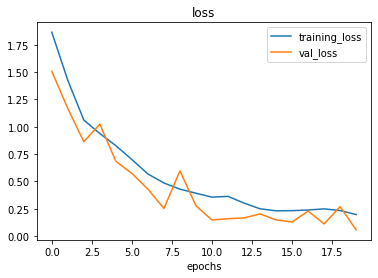

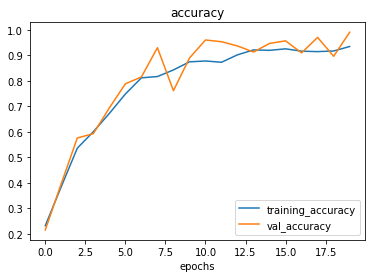

In [ ]:
plot_loss_curves(history_35)

Curves are close too which is good

## Summary of notes

model_29 seems to be working the best!

No need to augment the data in other ways as that seems to worsen the performance of the models

Actually, last model worked even better with an accuracy of 96%

Ok now model_35 seems to work the best, with smaller kernel size and padding - reached 98.99% accuracy

### Last experiment

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented_4 = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             )

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented_4 = train_datagen_augmented_4.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical",
                                                                    shuffle=True)

# Create non_augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="categorical")



Augmented training data
Found 1198 images belonging to 5 classes.
Non-augmented training data:
Found 1198 images belonging to 5 classes.
Non-augmented test data:
Found 297 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_35 = Sequential([
    Conv2D(15, 2, input_shape=(224,224,3), padding='same'),
    Activation(activation='relu'),
    Conv2D(15, 2, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(15, 2, activation='relu', padding='same'),
    Conv2D(15, 2, activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # Changed to have 5 output neurons
])

# Compile the model
model_35.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_35 = model_35.fit(train_data_augmented_4,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
38/38 [==============================] - 226s 6s/step - loss: 1.7382 - accuracy: 0.2513 - val_loss: 1.5064 - val_accuracy: 0.4781
Epoch 2/20
38/38 [==============================] - 17s 453ms/step - loss: 1.2904 - accuracy: 0.4558 - val_loss: 0.8956 - val_accuracy: 0.6599
Epoch 3/20
38/38 [==============================] - 18s 464ms/step - loss: 0.9540 - accuracy: 0.6152 - val_loss: 0.8100 - val_accuracy: 0.6768
Epoch 4/20
38/38 [==============================] - 18s 460ms/step - loss: 0.8288 - accuracy: 0.6745 - val_loss: 0.5635 - val_accuracy: 0.8249
Epoch 5/20
38/38 [==============================] - 17s 449ms/step - loss: 0.6980 - accuracy: 0.7321 - val_loss: 0.3888 - val_accuracy: 0.8956
Epoch 6/20
38/38 [==============================] - 17s 442ms/step - loss: 0.5972 - accuracy: 0.7788 - val_loss: 0.5258 - val_accuracy: 0.8047
Epoch 7/20
38/38 [==============================] - 18s 480ms/step - loss: 0.5310 - accuracy: 0.8030 - val_loss: 0.3260 - val_accuracy: 0.8855
E

# Getting familiar with data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

# Walk through the Handwriting_Sample directory and list number fo files
for dirpath, dirnames, filenames in os.walk("gdrive/MyDrive/Multi_Class_Handwriting_Samples"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("gdrive/MyDrive/Multi_Class_Handwriting_Samples/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirectory
print(class_names)

['anatoli' 'douglas' 'ksenia' 'yulia' 'zhentao']


In [ ]:
# Define directory dataset paths
train_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/train/"
test_dir = "gdrive/MyDrive/Multi_Class_Handwriting_Samples/test/"

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented_3 = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             )

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented_3 = train_datagen_augmented_3.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical",
                                                                    shuffle=False)

# Create non_augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=False)

IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="categorical")


# Here have intentionally set shuffle to False just so we can visualise the data

Augmented training data
Found 1198 images belonging to 5 classes.
Non-augmented training data:
Found 1198 images belonging to 5 classes.
Non-augmented test data:
Found 297 images belonging to 5 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented_3.next() # Note: labels are not augmented, only the images are

Showing image number: 17


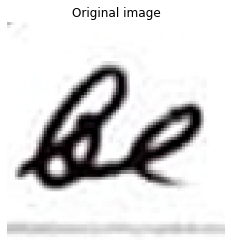

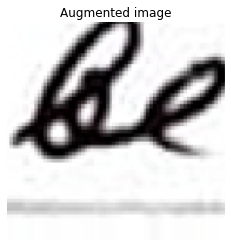

In [ ]:
# Show original image and augmented image
import random
import matplotlib.pyplot as plt

random_number = random.randint(0, 31) # Our batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);